# COGS 108 - COVID Infections/Deaths and State Socioeconomic Conditions

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Stephen Kim
- Clara Yi
- Ethan Lee
- Ernest Lin
- Wesley Nguyen

<a id='research_question'></a>
# Research Question

Does the macroscopic socioeconomic status of a state have a correlation to COVID infection and mortality rates in 2020-2021? Socioeconomic status will take into account median income, percentage of population without health insurance, and prevalence of blue collar workers in the labor force.

<a id='background'></a>

## Background & Prior Work

### Introduction
When a society faces unusual challenges, it often leads to major cultural shifts and realizations. COVID-19, which has impacted the global society in unpredictable and significant ways, stands as an opportunity for data scientists to gain insight into the nuances of healthcare, labor, and economics. By analyzing information from the CDC's database on COVID-19 related deaths, information from the United States Census Bureau, as well as data from the US Bureau of Labor Statistics, our team hopes to shed light on whether or not a state's overall socioeconomic breakdown influenced their COVID-19 mortality rate in 2020. Our macroscopic approach to this data science problem is motivated by the availability of consistent and state-specific data. We additionally propose a predictive model in the form of a function which uses the analyzed trends to make a prediction of covid mortality rate based on three hypothetical values: a specifed median income, % of population without healthcare, and % of labor force in blue collar jobs. 

### Prior Work
An health policy article by Adhikari, S. et. al [1] discussed the early impact of COVID-19 based on a city's income level and race/ethnicity data. Their paper focused on ten major cities and discovered a positive correlation between lower income, more diverse areas and an increase in COVID-19 death and infection rates. According to an American Medical Association review of Adhikari's publication, there is "no biological or genetic basis for why these inequities would exist". While this article suggests an important relationship between income, race, and COVID-19 impact, our research team wishes to better understand this relationship on a state-level scale. This macroscopic approach has also been deemed meaningful by larger organizations such as the NIH, as expressed in a 2020 publication from the Journal of General Internal Medicine [2]. The researchers in this study used the Gini index as their measurement of income inequality. They acknowledge that income levels may be representative of a state's healthcare resources and number of essential occupations, but we believe that by directly analyzing health insurance and labor statistics in our research will paint a clearer picture of what previous scientists have already suggested.

References (include links):
- 1) https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2768723?resultClick=1
- 2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7313247/

# Hypothesis


Based on our prior research, we hypothesize that there will be a negative correlation between median income and COVID morality rate, positive correlation between the percent of the population without health insurance and COVID morality rate, and a positive correlation between the rate of "blue collar" workers among the labor force and COVID mortality rate. By combining our three socioeconomic factors into a summarizing coefficient, we hope to create a predicitive model that reflects this hypothesis.

Firstly, we believe that there will be a negative correlation between a state's median income and COVID mortality rate because we think that in states with a higher median income, more people will have access to healthcare since more people can afford healthcare. Thus, if more people have access to healthcare in these higher median income states, then we believe that their COVID mortality rates will lower compared to states with a lower median income as people there can seek medical attention more frequently and easily. Additionally, higher incomes also allow for more health-related expenditures as well as higher-quality diets. We also believe that there will be a negative correlation between income and infection rate because higher-paying jobs are often more sedentary in nature, enabling greater work envrionment flexibility and work-from-home options. But we recognize the correlation will likely not be as strong as high-paying on-site jobs (ex: equipment installers, repairers, building inspectors) [1] and low-paying sedentary jobs exists in the current economy.

Secondly, we believe that there will be a positive correlation between the percentage of a state's population without health insurance and COVID mortality rate because in states where a higher percentage of people don't have health insurance, there is a higher percentage of people who do not have access to healthcare. Thus, when people contract COVID, there is a higher likelihood that they don't seek out healthcare because they cannot afford it. Thus, the COVID mortality rate will be higher in states where there is a higher percentage of people without health insurance. We believe there will also be a positive correlation between health insurance and infection rate as people who take advantage of insurance to seek medical care more often may have healthier bodies and more robust immune systems. However, we think the relationship is much weaker as COVID itself is capable of infecting younger, healthier hosts almost as effectively as other hosts. We know this because by the first summer of the pandemic, it was well established the younger, supposedly healthier people (like those under 30) were comprising a large proportion (as much as 20%) of all known cases [2].

Lastly, we believe that there will be a positive correlation between a state's rate of "blue collar" workers among the labor force and its COVID mortality rate because blue collar jobs involve manual labor, so professions like construction workers, auto mechanics, and truck drivers are all blue collar workers. Because blue collar jobs involve being physically present in the workfield, blue collar workers are more likely to be exposed to COVID since they have to go outside more often. On the other hand, white collar jobs include corporate/office/desk jobs that have been adapted to remote work, or work from home lifestyles. Thus, white collar workers might not have to go outside as much as blue collar workers. Because blue collar workers have to go outside more often, this mean they have a higher likelihood of being exposed to COVID, and so if a state has a higher percentage of blue collar workers, we hypothesize that the COVID mortality rate will also be higher.  For similar reasons, we also hypothesize that the infection rate will be higher with a higher percentage.

After testing all of our hypotheses, we will use out results to create a predictive model. 

References:
1. https://www.indeed.com/career-advice/finding-a-job/highest-paying-blue-collar-jobs
2. https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus/coronavirus-and-covid-19-younger-adults-are-at-risk-too#:~:text=But%20according%20to%20the%20U.S.,has%20continued%20into%20the%20fall.

# Dataset(s)

### Dataset 1

- Dataset Name: United States COVID-19 Cases and Deaths by State over Time
- Link to the dataset: https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36/data
- Number of observations: 44,280 rows, 15 columns, 664,200 observations total

This dataset contains the United States (and underlying US territories) data for its COVID rates over time. Such rates include total cases, new cases, total deaths, new deaths, and other metrics that give an overall view of the statistics of COVID for each state. There are submission dates for each row, so that is how we are going to link the rates to specific periods of time

### Dataset 2

- Dataset Name: Employees on nonfarm payrolls by state and selected industry sector, seasonally adjusted
- Link to the dataset: https://www.bls.gov/news.release/laus.t03.htm
- Number of observations: 50 rows, 9 columns, 450 observations total

Dataset from the US Bureau of Labor Statistics, counting the total number of employees in thousands in the labor force in each state as well as in each of eight industries (construction, manufacturing, trade/transportation/utilities, finance, services, education/health, leisure/hospitality, government).

### Dataset 3

- Dataset Name: Median Household Income and Percentage of Americans without Health Insurance in 2020
- Link to the dataset: https://docs.google.com/spreadsheets/d/174jFoW8KsXGJmpNUx8cbh6j4l6rhQhpOUKIPnkzk3lM/edit#gid=0
- Number of observations: 50 rows, 2 columns, 100 observations total

This dataset contains the United States' for the median household income and percentage of Americans without Health Insurance in 2020. This data was taken from two different sources, [United States Census Bureau Website](https://www.census.gov/quickfacts/fact/map/CA/HEA775220) and [Federal Reserve Economic Data](https://fred.stlouisfed.org/release/tables?rid=249&eid=259515&od=2020-01-01#), and all of this data was manually imported into a Google Sheet that was converted to a CSV file. 

### Dataset 4

- Dataset Name: Population
- Link to the dataset: https://data.ers.usda.gov/reports.aspx?ID=17827
- Number of observations: 50 rows, 2 columns, 100 observations total after cleaning

This dataset contains the United States' key population figures, recorded every ten years from 1990 to 2020. All data was sourced from the U.S. Census Bureau but was found on the site of the US Department of Agriculture. 

### Merging Data
Since we are using 4 different primary datasets, we will identify each state with a unique code (California would be CA, Missouri would be MO, etc.). Ultimately, we will merge the datasets during our analysis, with several rows of data for each state.

# Setup

In [ ]:
# these installations are not directly related to our EDA, but the necessary packages throughout all steps of our project. There are EDA-specific installations later.
# pip initial installation
!pip3 install pandas
!pip install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install openpyxl
!pip3 install sklearn
!pip3 install patsy 
!pip3 install statsmodels
!pip3 install openpyxl

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import patsy

# Data Cleaning

## Dataset 1 (COVID)
- With the imported data, we removed unncessary states. We only want the 50 states not including territories or DC
- We then removed the columns that we didn't need for analysis. We did this by selecting the columns that we needed
- We also wanted the dates to appear in a sortable/searchable way, so we made the dates arranged in yyyy-mm-dd format
- The data was then saved as a csv file.

**Note**: Since the data is arranged by date, we created a function ```read_covid_data``` that will return the 50 states with their respective data for just that specified date

In [ ]:
## Dataset 1 (COVID) Code

In [ ]:
# Cleaning State Data
def clean_covid_data():
    # Date Closure
    def apply_date(date: str) -> str:
        split_date = date.split("/")
        return "/".join([split_date[2], split_date[0], split_date[1]])
        
    
    # Read the data (already in tabular form)
    covid_data_url = r"./Raw Data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv"
    covid_data = pd.read_csv(covid_data_url)

    #display uncleaned data
    print("data before:")
    print(covid_data.head())
    print(covid_data.shape)
    
    # States we will not be looking at (These aren't part of the 50 states)
    remove_states = ["RMI", "FSM", "GU", "MP", "PW", "NYC", "PR", "AS", "VI", "DC"]
    covid_data = covid_data[~covid_data["state"].isin(remove_states)]
    
    # Remove columns we don't need
    covid_data = covid_data[["submission_date", "state", "tot_cases", "tot_death"]]
    
    # Change Date format to allow for easier sorting
    covid_data["submission_date"] = covid_data["submission_date"].apply(apply_date)
    
    # Sort Date
    covid_data.sort_values("submission_date", inplace=True, ascending=False)
    covid_data.reset_index(inplace=True, drop=True)
    
    if(covid_data.isnull().sum().sum() == 0):
        print("data has been cleaned, no missing cells. data after:")
        print(covid_data.head())
        print(covid_data.shape)

    # Save Data
    clean_covid_data_url = r"Cleaned Data/state_covid_data.csv"
    covid_data.to_csv(clean_covid_data_url, index=False)
    
clean_covid_data()

In [ ]:
def read_covid_data(month: int, day: int, year: int):
    #retrieve cleaned csv
    covid_data_url = r"Cleaned Data/state_covid_data.csv"
    covid_data = pd.read_csv(covid_data_url)
    
    #reformat date parameter to match data values in csv, then get all data from specific date
    date_filter = formatDate(month, day, year)
    covid_data = covid_data[covid_data["submission_date"] == date_filter]
    covid_data.sort_values("state", inplace=True)
    covid_data.reset_index(inplace=True, drop=True)
    
    return covid_data

def formatPreZero(num: int) -> str:

    #adds '0' char to any integer less than 10 to match formatting
    if num >= 10:
        return str(num)
    
    return "0" + str(num)
    
#reformat date parameter to match data values in csv    
def formatDate(month: int,  day: int, year: int) -> str:
    return f"{year}/{formatPreZero(month)}/{formatPreZero(day)}"

## Dataset 2 (Labor)
- The raw data file for Dataset 2 is an excel file. The format of the data was not organized in a way that complements dataframes, so we had a lot of unnecessary texts in the excel
read as data entries as well. 
- Our first step was to identify the columns and rows that we want, which are the 50 states. We removed unnecessary states (including U.S. territories) and removed all the extra
non-state entries that were read as rows.
- Another problem is that some names in the State column had some footnote numbers that were unintentionally read from the excel sheet. We solved this by removing all occurences of numbers and parentheses from the State column.
- Since other datasets use state codes and the original data uses state names, we had to transform state names in the States column to their corresponding state codes. We did this by defining a function ```to_state_code``` that uses a dictionary to map each state name to their state code.
- We had to reorganize the structure of the dataframe, as the original file had the data stacked on top of each other so each state had 3 rows in the Dataframe. We did so by separating the 
raw dataframe into three different dataframes, and then combining them into a single dataframe so we only have 50 rows.
- We then removed unnessary columns, such as data from other time periods (Our focus was December of 2020). We also combined the columns of job sectors into two groups relevant to our analysis: Blue collar (construction, mining, trade, leisure) and White collar (Financial, professional, education, government) jobs.
- Our final step for Dataset 3 is to export the cleaned dataset as a csv and save it to the "Cleaned Data" folder.

## Dataset 2 (Labor) Code

In [ ]:
#Copied from https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

def to_state_code(state_name):
    return us_state_to_abbrev[state_name]

In [ ]:
def clean_labor_data():
    #Read excel file, renames first column to States and take out null rows
    raw_labor_data = pd.read_excel("./Raw Data/labor_dataset_raw.xlsx", header = 4, engine = "openpyxl")
    
    #display uncleaned data
    print("data before:")
    print(raw_labor_data.head())
    print(raw_labor_data.shape)

    raw_labor_data.rename(columns={"Unnamed: 0": "State"}, inplace=True)
    raw_labor_data = raw_labor_data.dropna()

    #Take out data from 2021 and only keep 2020
    raw_labor_data = raw_labor_data[["State", "Dec.\n2020", "Dec.\n2020.1", "Dec.\n2020.2"]]
    
    non_states = ["Virgin Islands", "District of Columbia", "Puerto Rico"]

    #Removes all non official states from dataset
    for region in non_states:
        raw_labor_data = raw_labor_data[raw_labor_data["State"].str.contains(region)==False]

    #Reset index to start at 0
    raw_labor_data = raw_labor_data.reset_index(drop = True)

    #eliminated extra characters in state names
    raw_labor_data["State"] = raw_labor_data["State"].str.replace('\d+', '', regex=True)
    raw_labor_data["State"] = raw_labor_data["State"].str.replace('(', '', regex=True)
    raw_labor_data["State"] = raw_labor_data["State"].str.replace(')', '', regex=True)

    #Convert state names into codes (First two letters of each state name)
    raw_labor_data["State"] = raw_labor_data["State"].apply(lambda state_name: us_state_to_abbrev[state_name])

    #Original raw data has different columns stacked on top of each row, so we need to reorder the dataset.
    #Block 1 contains total, constructing and mining data
    block1 = raw_labor_data[:50]
    block1.columns = ["State", "Total", "Constructing", "Mining"]

    #Block 2 contains Trade, Financial and Professional
    block2 = raw_labor_data[50:100]
    block2.columns = ["State", "Trade", "Financial", "Professional"]

    #Block 3 contains Education, Leisure and Government
    block3 = raw_labor_data[100:]
    block3.columns = ["State", "Education", "Leisure", "Gov"]

    #merge all blocks into one dataframe
    labor_data = block1.merge(block2, on="State")
    labor_data = labor_data.merge(block3, on="State")

    #We only need data on white collar and blue collar, so we can combine each job sector to their respective group.
    labor_data["Blue_col"] = labor_data["Constructing"] + labor_data["Mining"] + labor_data["Trade"] + labor_data["Leisure"]
    labor_data["White_col"] = labor_data["Financial"] + labor_data["Professional"] + labor_data["Education"] + labor_data["Gov"]

    #Get rid of all other columns except State, White_col, Blue_col and Total
    labor_data.drop(columns = ["Constructing", "Mining", "Trade", "Financial", "Professional", "Education", "Leisure", "Gov"], inplace=True)
    labor_data.columns = ['state','tot_jobs','blue_col','white_col']

    #display cleaned data    
    if(labor_data.isnull().sum().sum() == 0):
        print("data has been cleaned, no missing cells. data after:")
        print(labor_data.head())
        print(labor_data.shape)

    #export as csv
    labor_data.to_csv('./Cleaned Data/state_labor_data.csv')

def get_labor_data():
    labor_data_url = './Cleaned Data/state_labor_data.csv'
    labor_data = pd.read_csv(labor_data_url)
    return labor_data

clean_labor_data()


## Dataset 3 (Income/Insurance)
- For Dataset 3, we have two primary steps in cleaning the data. The first step was manually inputting the data from the data sources to a CSV file via Google Sheets. This manual step was necessary due to the fact that the original data source did not have an option to directly extract/download the raw data. Since there were only 50 observations, we decided manual input was the best option. 

- Our second step for Dataset 3 was to import the data into this notebook. We uploaded the CSV file into our "Raw Data" folder, and then used read_csv to bring it into a dataframe, which is a usable format for our future analysis. After making sure there were no issues, we then saved it to the "Cleaned Data" folder.

## Dataset 3 (Income/Insurance) Code

In [ ]:
def standardize_income(string):
    string = string.strip()

    string = string.replace(',', '')
    return float(string)

# Cleaning socioeconomic data
def clean_socioeconomic_data():
    socioeconomic_data_url = r'./Raw Data/socioeconomic_data.csv'
    soci_data = pd.read_csv(socioeconomic_data_url)

    #display uncleaned data
    print("data before:")
    print(soci_data.head())
    print(soci_data.shape)
    

    #simplify columns and replace Median Household income values with floats
    soci_data.columns = ['state', '%_no_insurance', 'median_income']
    soci_data['median_income'] = soci_data['median_income'].apply(standardize_income)

    soci_data['with_insurance'] = 100 - soci_data['%_no_insurance'] 

    if(soci_data.isnull().sum().sum() == 0):
        print("data has been cleaned, no missing cells. data after:")
        print(soci_data.head())
        print(soci_data.shape)

    # Saving to CSV
    clean_socioeconomic_data_url = r"./Cleaned Data/clean_socioeconomic_data.csv"
    soci_data.to_csv(clean_socioeconomic_data_url, index=False)
    
def get_socioeconomic_data():
    clean_socioeconomic_data_url = r"./Cleaned Data/clean_socioeconomic_data.csv"
    soci_data = pd.read_csv(clean_socioeconomic_data_url)
    return soci_data

clean_socioeconomic_data()

## Dataset 4 (US population)
- The raw data is in csv format with population census data from the US government. For our purposes, we only want the state name and the population in 2020. Although it is 2022, there is not yet a fully released dataset on 2021 population data aside from estimates, so it is fine that we only have 2020 populations and we will be conducting our analysis for 2020.

- Since there are also US territories included and DC, we remove those unwanted rows. We also want to store states as their state code rather than their full name. There are also problems with having the population stored as a string, so we do some formatting to make the population be stored as an integer. Finally, we apply some renaming and then our data cleaning is complete.

https://data.ers.usda.gov/reports.aspx?ID=17827

## Dataset 4 (US population) Code

In [ ]:
def clean_population_data():
    def format_population(pop: str) -> int:
        pop = pop.replace(",", "")
        return int(pop)
    # get population data
    population_data_url = r"Raw Data/PopulationReport.csv"
    pop_data = pd.read_csv(population_data_url)

    #display uncleaned data
    print("data before:")
    print(pop_data.head())
    print(pop_data.shape)
    
    # keep only state name and total population 2020
    pop_data = pop_data[["Name", "Pop. 2020"]]
    
    # Remove unwanted Rows
    remove_rows = ["United States", "District of Columbia", "Puerto Rico", "Source: U.S. Census Bureau, 1990, 2000, 2010, 2020 Censuses of Population\n\n\n"]
    pop_data = pop_data[~pop_data["Name"].isin(remove_rows)]
    pop_data.dropna(inplace=True)
    
    # Change column name
    pop_data.columns = ["state", "total_population"]
    
    # Value formatting
    pop_data["total_population"] = pop_data["total_population"].apply(format_population)
    pop_data["state"] = pop_data["state"].apply(to_state_code)
  
    #display cleaned data
    if(pop_data.isnull().sum().sum() == 0):
        print("data has been cleaned, no missing cells. data after:")
        print(pop_data.head())
        print(pop_data.shape)

    # save to cleaned data
    cleaned_population_data_url = "Cleaned Data/population.csv"
    pop_data.to_csv(cleaned_population_data_url, index=False)
    
def read_population_data():
    cleaned_population_data_url = "Cleaned Data/population.csv"
    pop_data = pd.read_csv(cleaned_population_data_url)
    return pop_data

clean_population_data()

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Our EDA involves both univariate and multivariate data-viz techniques. The following is a brief summary of our EDA, but the comments scattered throughout the code are helpful to understand our results. One important thing to note is that for the COVID data, we added up the number of cases and infections throughout the 2020 year to get the proper counts. On the other hand, our other 3 datasets are instantaneously recorded, showing a snapshot of one point in time that represents 2020.

### Size
At the end of our data cleaning, we ended up with 4 dataframes with 50 rows each. The rows were made unique by their state identifier. The state identifiers are two-letter abberviations of the state that each row represents. We used these 4 dataframes and merged them into one using the following functions.

#### Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import patsy

#### Functions to Merge DataFrames

In [ ]:
def formatPreZero(num: int) -> str:

    #adds '0' char to any integer less than 10 to match formatting
    if num >= 10:
        return str(num)
    
    return "0" + str(num)
    
#reformat date parameter to match data values in csv    
def formatDate(month: int,  day: int, year: int) -> str:
    return f"{year}/{formatPreZero(month)}/{formatPreZero(day)}"

def read_covid_data(month: int, day: int, year: int):
    #retrieve cleaned csv
    covid_data_url = r"Cleaned Data/state_covid_data.csv"
    covid_data = pd.read_csv(covid_data_url)
    
    #reformat date parameter to match data values in csv, then get all data from specific date
    date_filter = formatDate(month, day, year)
    covid_data = covid_data[covid_data["submission_date"] == date_filter]
    covid_data.sort_values("state", inplace=True)
    covid_data.reset_index(inplace=True, drop=True)
    
    return covid_data

#retrieve cleaned labor data, socioeconomic data, and population data frames respectively

def get_labor_data():
    labor_data_url = 'Cleaned Data/state_labor_data.csv'
    labor_data = pd.read_csv(labor_data_url)
    return labor_data

def get_socioeconomic_data():
    clean_socioeconomic_data_url = "Cleaned Data/clean_socioeconomic_data.csv"
    soci_data = pd.read_csv(clean_socioeconomic_data_url)
    return soci_data

def get_population_data():
    cleaned_population_data_url = r"Cleaned Data/population.csv"
    pop_data = pd.read_csv(cleaned_population_data_url)
    return pop_data

#given date parameters, get_overall_data calls functions above and then attempts to merge the resulting dataframes
def get_overall_data(month: int, day:int, year:int):
    covid_data = read_covid_data(month, day, year)
    soci_data = get_socioeconomic_data()
    labor_data = get_labor_data()
    pop_data = get_population_data()

    #merge all dataframes together into a 50 row * 11 col dataframe with key data
    overall_df = pd.merge(labor_data, soci_data, left_on='state', right_on='state')
    overall_df = pd.merge(overall_df, covid_data, left_on='state', right_on='state')
    overall_df = pd.merge(overall_df, pop_data, left_on="state", right_on="state")
    overall_df.drop(["Unnamed: 0"], axis="columns", inplace=True)
    
    #rename first 11 columns
    overall_df.columns = ['state', 'total_jobs', 'blue_collar', 'white_collar', '%_no_insurance', 'median_income', 
                          '%_with_insurance', 'submission_date', 'total_cases', 'total_deaths', "total_population"]

    #add 4 new columns: mortality rate, % of blue/white collar laborers in workforce, and infection rate
    overall_df['%_mortality_rate'] = (overall_df['total_deaths'] / overall_df['total_cases']) * 100
    overall_df['%_blue_collar'] = overall_df['blue_collar'] / overall_df['total_jobs'] * 100
    overall_df['%_white_collar'] = overall_df['white_collar'] / overall_df['total_jobs'] * 100
    overall_df["%_infection_rate"] = (overall_df["total_cases"] / (overall_df["total_population"] - overall_df["total_deaths"])) * 100


    overall_df = overall_df[['state', 'total_jobs', 'blue_collar', '%_blue_collar', 'white_collar', '%_white_collar', 
                            'median_income', '%_no_insurance', '%_with_insurance', 'submission_date', 'total_population', 
                            'total_cases', 'total_deaths',  '%_mortality_rate', '%_infection_rate']]
    return overall_df

In [ ]:
#define socioeconomic coefficient (prosperity coefficient)
def calculate_alpha(median_income, with_insurance, white_labor):
    # alpha is the name of our coeff, it takes the three variables and standardizes them, then assigns them equal weight.
    alpha = ((((median_income/100000)*0.3333)) + (with_insurance/100)*0.3333 + (white_labor/100)*0.3333)
    return alpha

#### Calling the functions (Consolidating/Combining Data)

In [ ]:
# use get_overall_data
overall_df = get_overall_data(12, 12, 2021)

# create column for calculated coeffeicients
overall_df['coeff'] = calculate_alpha(overall_df['median_income'],overall_df['%_with_insurance'], overall_df['%_white_collar'])

overall_df.head()

### A Quick Note on Missingness
None of our required data was missing due to the nature of our source databases. The US Census data requires averages and census information from each state, as well as the CDC. One way we prevented missingness or inconsistency in our data was by eliminating US territories, like Washington DC. However, after the data cleaning portion of our project, we do not have any missing data to deal with.

A second important note is that %_white_collar and %_blue_collar do NOT add up to 100%, because white collar and blue collar categories were generated from the job counts for a finite number of industry categories. Obviously, some employees may be employed in industries not counted by the Bureau of Labor Statistics.

### Shape
We conduct a series of data vizualization steps to show what our current data looks like. By the way, now might be a good time to take a look at some of the general stats of our dataframe.


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
overall_df.describe()

## Explanation of Key Variables in Overall Dataframe

**total_jobs** : Total number of employees on nonfarm payrolls, in thousands

**blue_collar**: Total number of employees in construction, mining, trade, and leisure industries, in thousands

**white_collar**: Total number of employees in financial, professional, educational, and government industries, in thousands

**%_blue_collar**: number of blue collar employees / total number of jobs

**%_white_collar**: number of white collar employees / total number of jobs

**median_income**: median individual income, in USD

**%_no_insurance**: % of eligible adults without health insurance

**%_with_insurance**: % of eligible adults with health insurance

**total_population**: total population

**total_cases**: total reported covid-19 cases

**total_deaths**: total reported covid19-related deaths

**%_mortality_rate**: deaths / cases

**%_infection_rate**: cases / total population

**coeff**: a general socioeconomic measure, calculated by equally weighting the median income figure, % with insurance, and rate of white collar labor to generate a value between 0 and 1.

Now that we have more of the general descriptive stats on here, let's look at some of the relationships we can easily visualize between our independent variables (socioeconomic factors) and our dependent variable (COVID data). We can accomplish this using scatterplots.

In [ ]:
#print slope/intercept data
def getSiData(slope1, int1, slope2, int2):
    print('SLOPE INTERCEPT DATA:\nLEFT GRAPH: ')
    print('SLOPE: ' + str(slope1) + ' INTERCEPT: ' + str(int1))
    print('\nRIGHT GRAPH: ')
    print('SLOPE: ' + str(slope2) + ' INTERCEPT: ' + str(int2))

#### Scatterplot 1: Relationship between COVID and Median Income

In [ ]:
# scatterplot 1 (median_income vs mortality_rate) and (median_income vs infection_rate)

#initialize the figure and scatterplots
fig = plt.figure(figsize = (30, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

a1, b1 = np.polyfit(overall_df['median_income'], overall_df['%_mortality_rate'], 1)
a2, b2 = np.polyfit(overall_df['median_income'], overall_df['%_infection_rate'], 1)


#integrate data from overall_df/data from all states
ax1.scatter(overall_df['median_income'], overall_df['%_mortality_rate'])
ax2.scatter(overall_df['median_income'], overall_df['%_infection_rate'])

#titles and axis labels
ax1.set_title('Median Income vs. Mortality Rate', fontsize = 20)
ax1.set_xlabel('Median Income', fontsize = 20)
ax1.set_ylabel('Mortality Rate', fontsize = 20)

ax2.set_title('Median Income vs. Infection Rate', fontsize = 20)
ax2.set_xlabel('Median Income', fontsize = 20)
ax2.set_ylabel('Infection Rate', fontsize = 20)

ax1.plot(overall_df['median_income'], a1*overall_df['median_income'] + b1)
ax2.plot(overall_df['median_income'], a2*overall_df['median_income'] + b2)
plt.show()

#print slope/intercept data
getSiData(a1, b1, a2, b2)

Each of the scatterplots above contain 50 data points each, with an individual data point representing one state. Thus, the scatterplot on the left contains 50 data points that represent a state's median income and COVID mortality rate while the scatterplot on the right contains 50 data points that represent a state's median income and COVID infection rate. Additionally, no data points are missing as we intentionally chose, cleaned, and analyzed datasets that had data for all 50 states. 

In the code to generate the scatterplots, we used matplotlib and its scatter function to generate the two scatterplots side-by-side. Additionally, we used numpy (np), specifically np.polyfit(), to create the line of best fit for the two scatterplots. Thus, the scatterplot on the left has a line of best fit to represent the relationship between a state's median income and COVID mortality rate. Similarly, the scatterplot on the right has a line of best fit to represent the relationship between a state's median income and COVID infection rate. 

Both of the scatterplots show the same negative, moderate trend. The scatterplot on the left shows that as a state's median income increases, its COVID mortality rate decreases. Similarly, the scatterplot on the right shows that as a state's median income increases, its COVID infection rate decreases. Going back to our research question, these two scatterplots do show that there is a negative correlation between a state's median income and COVID mortality and infection rates. However, we cannot prove causation without performing an experiment. 

One possible explanation for why there is a negative correlation in both scatterplots is that states with higher median incomes means that there are more people with higher incomes. Thus, this higher wealth means that people in these states can afford better healthcare while people in lower-income states might not have access to the same healthcare. Thus, states with a higher median income will tend to have a lower COVID mortality and infection rate since there are more people who can afford healthcare. 

#### Scatterplot 2: Relationship between COVID and Insurance

In [ ]:
# scatterplot 2 (with_insurance vs morality_rate) and (with_insurance vs infection_rate) (wesley)

#initialize the figure and scatterplots
fig2 = plt.figure(figsize = (35, 15))
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)

a1, b1 = np.polyfit(overall_df['%_with_insurance'], overall_df['%_mortality_rate'], 1)
a2, b2 = np.polyfit(overall_df['%_with_insurance'], overall_df['%_infection_rate'], 1)

#integrate data from overall_df/data from all states
ax1.scatter(overall_df['%_with_insurance'], overall_df['%_mortality_rate'])
ax2.scatter(overall_df['%_with_insurance'], overall_df['%_infection_rate'])

#titles and axis labels
ax1.set_title('Percent of Population with Insurance vs. Mortality Rate', fontsize = 20)
ax1.set_xlabel('Percent of Population with Insurance', fontsize = 20)
ax1.set_ylabel('Mortality Rate', fontsize = 20)

ax2.set_title('Percent of Population with Insurance vs. Infection Rate', fontsize = 20)
ax2.set_xlabel('Percent of Population with Insurance', fontsize = 20)
ax2.set_ylabel('Infection Rate', fontsize = 20)


ax1.plot(overall_df['%_with_insurance'], a1*overall_df['%_with_insurance'] + b1)
ax2.plot(overall_df['%_with_insurance'], a2*overall_df['%_with_insurance'] + b2)
plt.show()

#print slope/intercept data
getSiData(a1, b1, a2, b2)

These two scatterplots are very similar to the scatterplots in the previous section that showed a negative correlation between a state's median income and COVID mortality and infection rates. 

Each of the scatterplots above contain 50 data points each, with an individual data point representing one state. Thus, the scatterplot on the left contains 50 data points that represent a state's percentage of people who have health insurance and COVID mortality rate while the scatterplot on the right contains 50 data points that represent a state's percentage of people who have health insurance and COVID infection rate. Additionally, no data points are missing as we intentionally chose, cleaned, and analyzed datasets that had data for all 50 states. 

The scatterplot on the left has a line of best fit to represent the relationship between a state's percentage of people who have health insurance and COVID mortality rate. Similarly, the scatterplot on the right has a line of best fit to represent the relationship between a state's percentage of people who have health insurance and COVID infection rate. 

Both of the scatterplots show the same negative, moderate trend. The scatterplot on the left shows that as a state's percentage of people who have health insurance increases, its COVID mortality rate decreases. Similarly, the scatterplot on the right shows that as a state's percentage of people who have health insurance increases, its COVID infection rate decreases. Going back to our research question, these two scatterplots do show that there is a negative correlation between a state's percentage of people who have health insurance and COVID mortality and infection rates. However, we cannot prove causation without performing an experiment. 

One possible explanation for why there is a negative correlation in both scatterplots is that states with a higher percentage of people with health insurance means that there are more people with access to healthcare. Thus, this higher access means that people in these states can afford better healthcare and get treated for COVID while people in lower-percentage states might not have access to the same healthcare. Thus, states with a higher percentage of people with health insurance will tend to have a lower COVID mortality and infection rate since there are more people who can access healthcare. 

#### Scatterplot 3: Relationship between COVID and Labor Distribution

In [ ]:
# scatterplot 3 (%_white_collar vs morality_rate) and (%_white_collar vs infection_rate)

#initialize the figure and scatterplots
fig3 = plt.figure(figsize = (35, 15))
ax1 = fig3.add_subplot(121)
ax2 = fig3.add_subplot(122)

a1, b1 = np.polyfit(overall_df['%_white_collar'], overall_df['%_mortality_rate'], 1)
a2, b2 = np.polyfit(overall_df['%_white_collar'], overall_df['%_infection_rate'], 1)

#integrate data from overall_df/data from all states
ax1.scatter(overall_df['%_white_collar'], overall_df['%_mortality_rate'])
ax2.scatter(overall_df['%_white_collar'], overall_df['%_infection_rate'])

#titles and axis labels
ax1.set_title('Percent of Labor Force in White-Collar Industries vs. Mortality Rate', fontsize = 20)
ax1.set_xlabel('Percent White-Collar', fontsize = 20)
ax1.set_ylabel('Mortality Rate', fontsize = 20)

ax2.set_title('Percent of Labor Force in White-Collar Industries vs Infection Rate', fontsize = 20)
ax2.set_xlabel('Percent White-Collar', fontsize = 20)
ax2.set_ylabel('Infection Rate', fontsize = 20)

ax1.plot(overall_df['%_white_collar'], a1*overall_df['%_white_collar'] + b1)
ax2.plot(overall_df['%_white_collar'], a2*overall_df['%_white_collar'] + b2)

plt.show()

#print slope/intercept data
getSiData(a1, b1, a2, b2)


Each of the scatterplots above contain 50 data points each, with an individual data point representing one state. Thus, the scatterplot on the left contains 50 data points that represent a state's percentage of laborers in white-collar industries and COVID mortality rate while the scatterplot on the right contains 50 data points that represent a state's percentage of white collar laborers and COVID infection rate. Additionally, no data points are missing as we intentionally chose datasets with data for all 50 states. 

The scatterplot on the left has a line of best fit to represent the relationship between a state's percentage of white collar laborers and COVID mortality rate, while the scatterplot on the right has a line to represent the relationship between percentage of white collar laborers and COVID infection rate. 

The scatterplot on the left technically shows a positive trend (slope < 0.01) but the scatterplot points are so far dispersed from the line of best fit, and the slope is so small, that the correlation is virtually nonexistent, if there even is one. There does not appear to be evidence of a direct relationship between white/blue collar labor distribution and COVID mortality rate. In contrast, the scatterplot on the right shows a more obvious negative trend (slope = -.41), with a moderate correlation. This indicates that a higher percentage of white collar laborers in the workforce is related to a decrease in COVID infection rate. This says nothing about causation.

One possible explanation for why there is no correlation between mortality rate and labor distribution is that blue collar workers may get infected more often (discussed later in the paragraph) but they have a survival advantage as their profession requires developing a stronger body or immune system, as a result of being in contact with many people and/or doing labor-intensive activity. White collar workers, meanwhile, have the advantage as they are infected less often and do not have to strain their bodies as much or face hazardous conditions that may compromise their health. A possible explanation for the negative correlation between infection rate and labor distribution is that blue collar workers are much less likely to have a work-from-home option, and/or come into contact with more members of the public.


#### Scatterplot 4: Relationship Between Alpha Coeff and COVID



In [ ]:
#initialize the figure and scatterplots
fig3 = plt.figure(figsize = (35, 15))
ax1 = fig3.add_subplot(121)
ax2 = fig3.add_subplot(122)

a1, b1 = np.polyfit(overall_df['coeff'], overall_df['%_mortality_rate'],1)
a2, b2 = np.polyfit(overall_df['coeff'], overall_df['%_infection_rate'], 1)

#integrate data from overall_df/data from all states
ax1.scatter(overall_df['coeff'], overall_df['%_mortality_rate'])
ax2.scatter(overall_df['coeff'], overall_df['%_infection_rate'])

#titles and axis labels
ax1.set_title('Socioeconomic Coefficient vs. Mortality Rate', fontsize = 20)
ax1.set_xlabel('Socioeconomic Coefficient', fontsize = 20)
ax1.set_ylabel('Mortality Rate', fontsize = 20)

ax2.set_title('Socioeconomic Coefficient vs Infection Rate', fontsize = 20)
ax2.set_xlabel('Socioeconomic Coefficient', fontsize = 20)
ax2.set_ylabel('Infection Rate', fontsize = 20)

ax1.plot(overall_df['coeff'], a1*overall_df['coeff']+b1)
ax2.plot(overall_df['coeff'], a2*overall_df['coeff']+b2)



plt.show()

#print slope/intercept data
getSiData(a1, b1, a2, b2)

Each of the scatterplots above contain 50 data points each, with an individual data point representing one state. Thus, the scatterplot on the left contains 50 data points highlighting each state's alpha score calculation (a simplified measure of socioeconomic conditions, where higher = better conditions) and COVID mortality rate while the scatterplot on the right contains 50 data points that the state alpha score and COVID infection rate. Additionally, no data points are missing as we intentionally chose datasets with data for all 50 states. 

The scatterplot on the left and right both have lines of best fit to represent the relationships between their corresponding variables. The scatterplot on the left shows a negative trend (slope = -1.19) meaning that as a state's alpha score increases, its COVID mortality rate decreases. Similarly, the scatterplot on the right has a negative trend (slope = -34.16) meaning that as a state's alpha score increases, its COVID infection rate decreases. Going back to our research question, these two scatterplots do show that there is a decline in COVID mortality and infection rates as the general socioeconomic situation improves. However, we cannot prove causation without performing an experiment.

### Hm... well now that we've seen the general trends in our data, let's dive into deeper analyses! Here we will begin to understand the variability in our data.

#### Linear regression for mortality rate and all socioeconomic variables

In [ ]:

# 1 day worth of data
mortality_regression_data = get_overall_data(12, 12, 2021)
mortality_regression_data = mortality_regression_data[["%_white_collar", "median_income", "%_with_insurance", "%_mortality_rate"]]
# Scatterplot matrix of each data type
sns.pairplot(mortality_regression_data, kind="scatter")
plt.show()
# setup regression data
mortality_X = mortality_regression_data[["%_white_collar", "median_income", "%_with_insurance"]]
mortality_Y = mortality_regression_data["%_mortality_rate"]
# create and fit model
mortality_model = linear_model.LinearRegression()
mortality_model.fit(mortality_X, mortality_Y)
# get relationship coefficients
print(mortality_model.coef_)

# 23 days worth of data
data_points = [
    (4, 10, 2020),
    (5, 10, 2020),
    (6, 10, 2020),
    (7, 10, 2020),
    (8, 10, 2020),
    (9, 10, 2020),
    (10, 10, 2020),
    (11, 10, 2020),
    (12, 10, 2020),
    (1, 10, 2021),
    (2, 10, 2021),
    (3, 10, 2021),
    (4, 10, 2021),
    (5, 10, 2021),
    (6, 10, 2021),
    (7, 10, 2021),
    (8, 10, 2021),
    (9, 10, 2021),
    (10, 10, 2021),
    (11, 10, 2021),
    (12, 10, 2021),
    (1, 10, 2022),
    (2, 10, 2022)
]
# get data
mortality_regression_data = pd.DataFrame(columns=["%_white_collar", "median_income", "%_with_insurance", "%_mortality_rate"])

for point in data_points:
    df = get_overall_data(*point)

    df = df[["%_white_collar", "median_income", "%_with_insurance", "%_mortality_rate"]]
    mortality_regression_data = pd.concat([mortality_regression_data, df], ignore_index=True)
# generate scatterplot matrix
sns.pairplot(mortality_regression_data, kind="scatter")
plt.show()
# setup regression data
mortality_X = mortality_regression_data[["%_white_collar", "median_income", "%_with_insurance"]]
mortality_Y = mortality_regression_data["%_mortality_rate"]
# create and fit model
mortality_model = linear_model.LinearRegression()
mortality_model.fit(mortality_X, mortality_Y)
# get relationship coefficients
print(mortality_model.coef_)

We can see that as the COVID-19 pandemic went on, the data fluctuates, but for the most part, there isn't much drastic change as to the relationships between our independent variables and our dependent variable (mortality/infection rates). This general trend exists that:

There is no significant relationship between white collar labor rates and mortality rates.

The higher the median income, the lower the mortality rate.

The more people with insurance, the lower the mortality rate.

#### Least Square for Mortaility Rate and Socioeconomic Variables
##### Mortality Rate and Socioeconomic Variables Analysis
In this section, we perform Ordinary Least Square (OLS) analysis to determine the relationship(s) between the variables and determine if the coefficients of our parameters are from a valid hypothesis: **If these variables lead to a relationship with Mortality Rate**

We start off our analysis by comparing all of our variables together in this formula. We are going to be using the standard alpha value of **0.05** to determine if our hypothesis is correct

```%_mortality_rate``` = ```%_white_collar``` + ```median_income``` +  ```%_with_insurance```

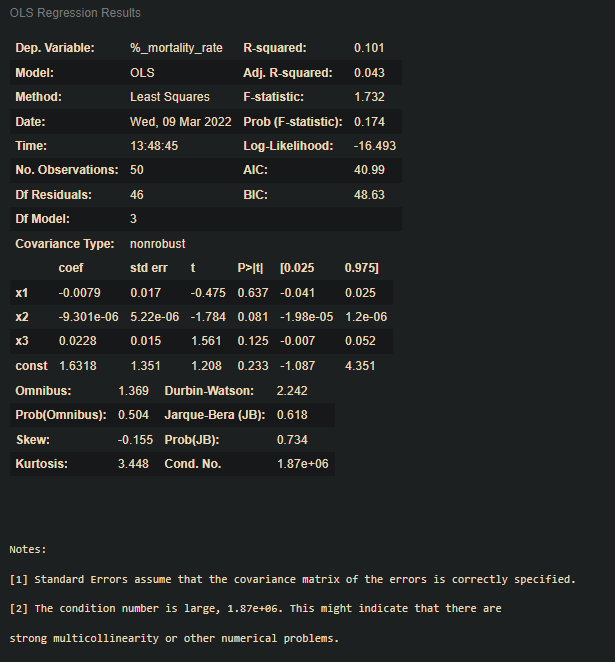

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_white_collar", "median_income", "%_with_insurance"]]
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_white_collar"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["median_income"], mortality_OLS_X)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_with_insurance"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

This is the results of the OLS

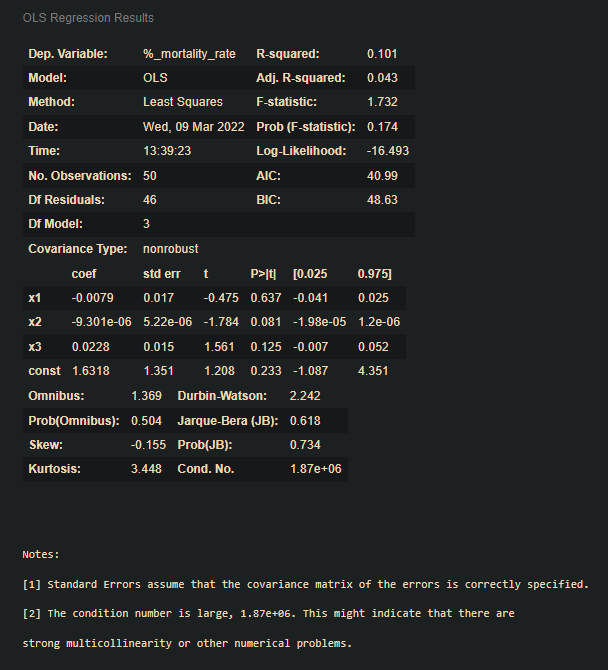

We can see that each of the p-values are less that our corresponding alpha so this is a start to accepting our null hypothesis, but looking at the F-statistic, we calculate our F-critical value to be 2.807 since we have 46 degrees of freedom and 3 variables. This value is smaller than our F-statistic, so everything is loking good for our null hypothesis. 

The strong multicollinearity note at the bottom of the analysis, however, is a bit concerning. Now, we will look into the multicollinearity.

First, we look at each variable independently.

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_white_collar"]]
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# create variables for least square
mortality_OLS_X = sm.add_constant(mortality_OLS_data["%_white_collar"])# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["median_income"]]
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# create variables for least square
mortality_OLS_X = sm.add_constant(mortality_OLS_data["median_income"])# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_with_insurance"]]
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# create variables for least square
mortality_OLS_X = sm.add_constant(mortality_OLS_data["%_with_insurance"])# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

Here are the results:

**% White Collar**
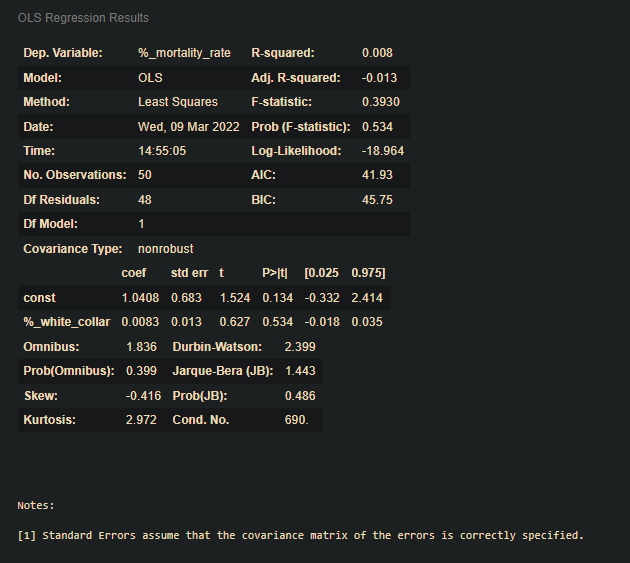
**Median Income**
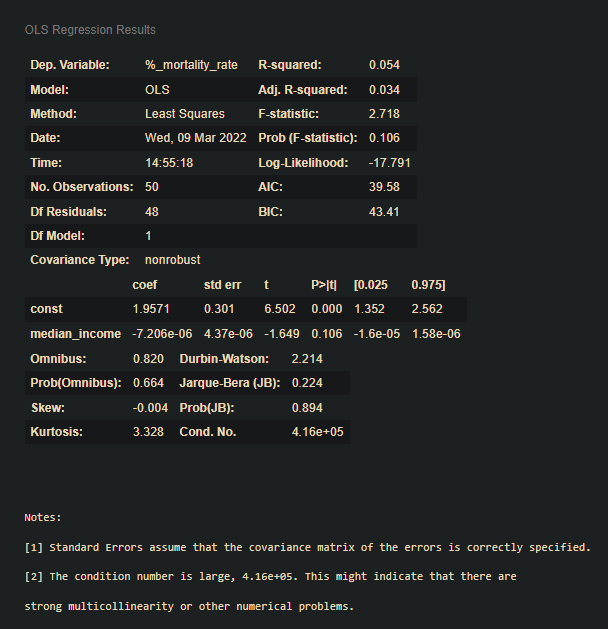
**% With Insurance**
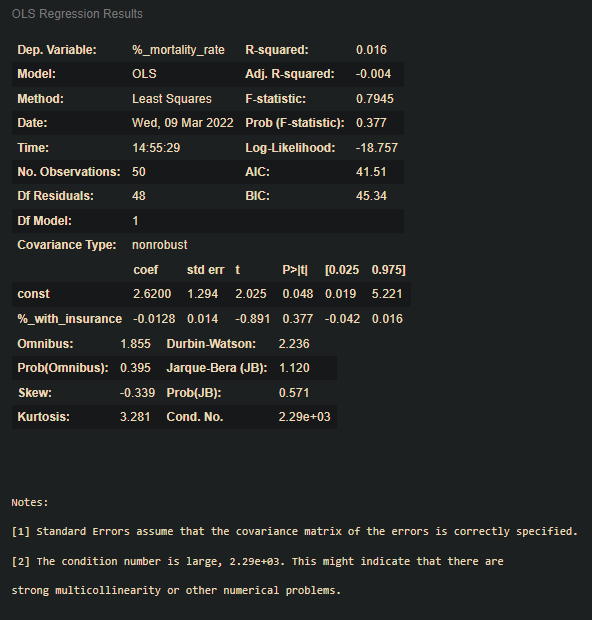

As you can see, ```%_white_collar``` provides a reliable regression solution as the null hypothesis that of ```%_mortality_rate``` = ```%_white_collar``` is accepted by this result.

The other two do not share the same relationship. They still suffer from multicollinearity. Let's see if we can create pairings that will eliminate that.

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_white_collar", "median_income"]]
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_white_collar"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["median_income"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_white_collar", "%_with_insurance"]]
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_white_collar"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_with_insurance"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["median_income", "%_with_insurance"]]
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["median_income"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_with_insurance"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

Here are the results:

**% White Collar + Median Income**
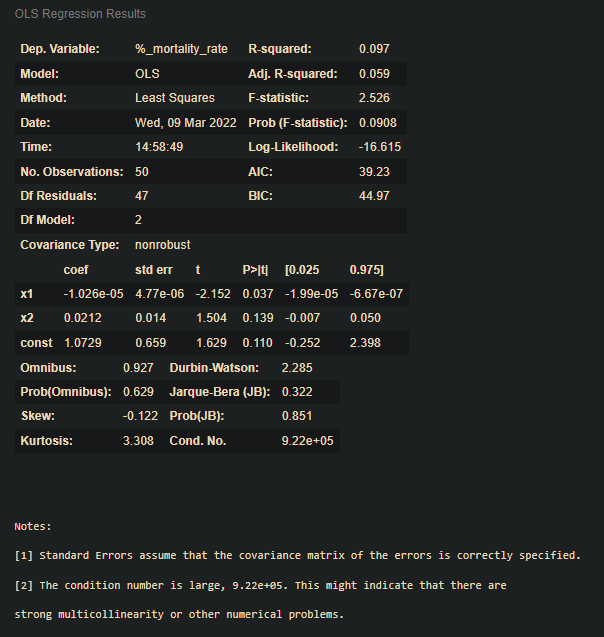
**% White Collar + % With Insurance**
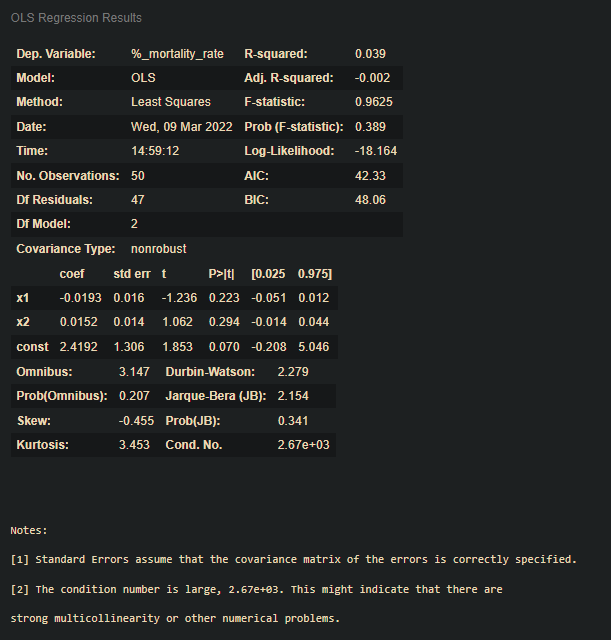
**Median Income + % With Insurance**
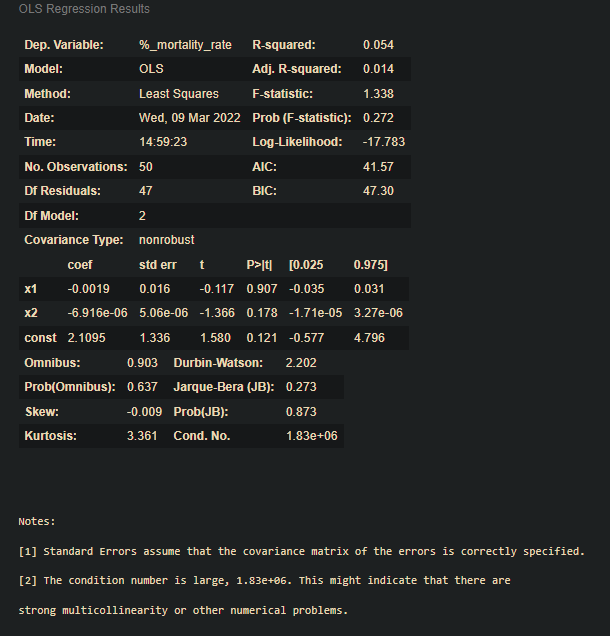

We can see that the multicollinearity results, unfortunately, are not solved by pairings nor by individual relationships. Let's try some approaches to try to eliminate the multicollinearity.
### Approach 1 (Normalize Collinear Data)
#### Mean Normalization
We shouldn't need to worry about ```%_white_collar``` since we've ruled out that this variable is not collinear with mortality rate.

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_white_collar", "median_income", "%_with_insurance"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# mean normalization
mortality_X["median_income"] = (mortality_X["median_income"]-mortality_X["median_income"].mean())/mortality_X["median_income"].std()
mortality_X["%_with_insurance"] = (mortality_X["%_with_insurance"]-mortality_X["%_with_insurance"].mean())/mortality_X["%_with_insurance"].std()
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_white_collar"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["median_income"], mortality_OLS_X)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_with_insurance"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

Here is the result:

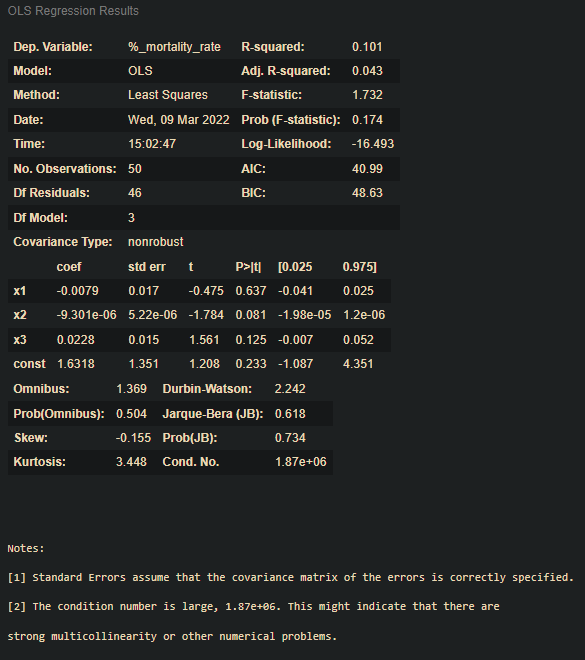

We can see that the multicollinearity issue is still not resolved, so let's isolate the variables and try pairings again. 

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["median_income"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# mean normalization
mortality_X["median_income"] = (mortality_X["median_income"]-mortality_X["median_income"].mean())/mortality_X["median_income"].std()
# create variables for least square
mortality_OLS_X = sm.add_constant(mortality_OLS_data["median_income"])# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square datat
mortality_X = mortality_OLS_data[["%_with_insurance"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# mean normalization
mortality_X["%_with_insurance"] = (mortality_X["%_with_insurance"]-mortality_X["%_with_insurance"].mean())/mortality_X["%_with_insurance"].std()
# create variables for least square
mortality_OLS_X = sm.add_constant(mortality_OLS_data["median_income"])# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_white_collar", "median_income"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# mean normalization
mortality_X["%_white_collar"] = (mortality_X["%_white_collar"]-mortality_X["%_white_collar"].mean())/mortality_X["%_white_collar"].std()
mortality_X["median_income"] = (mortality_X["median_income"]-mortality_X["median_income"].mean())/mortality_X["median_income"].std()
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_white_collar"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["median_income"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_white_collar", "%_with_insurance"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# mean normalization
mortality_X["%_white_collar"] = (mortality_X["%_white_collar"]-mortality_X["%_white_collar"].mean())/mortality_X["%_white_collar"].std()
mortality_X["%_with_insurance"] = (mortality_X["%_with_insurance"]-mortality_X["%_with_insurance"].mean())/mortality_X["%_with_insurance"].std()
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_white_collar"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_with_insurance"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["median_income", "%_with_insurance"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# mean normalization
mortality_X["median_income"] = (mortality_X["median_income"]-mortality_X["median_income"].mean())/mortality_X["median_income"].std()
mortality_X["%_with_insurance"] = (mortality_X["%_with_insurance"]-mortality_X["%_with_insurance"].mean())/mortality_X["%_with_insurance"].std()
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["median_income"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_with_insurance"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

Here are the results:

**Median Income**
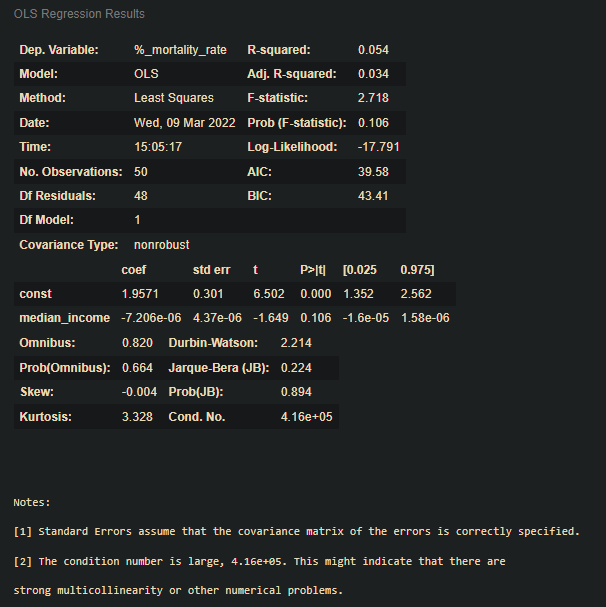
**% With Insurance**
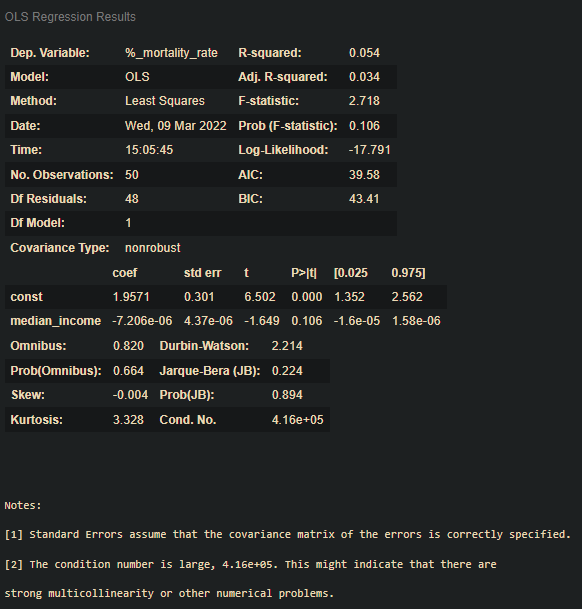
**% White Collar + Median Income**
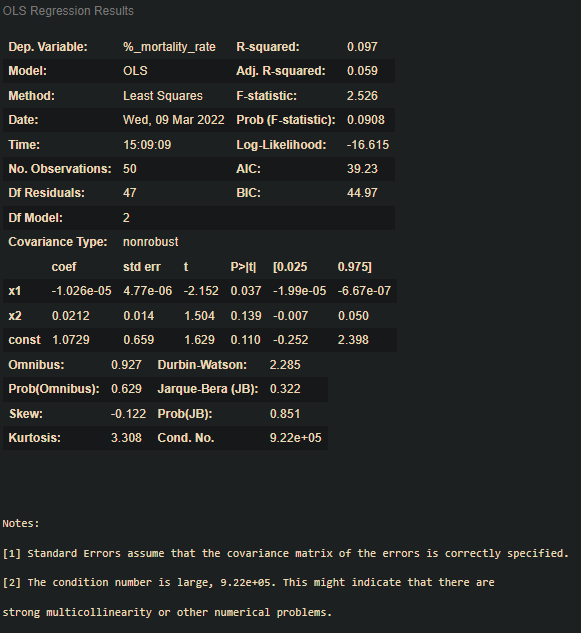
**% White Collar + % With Insurance**
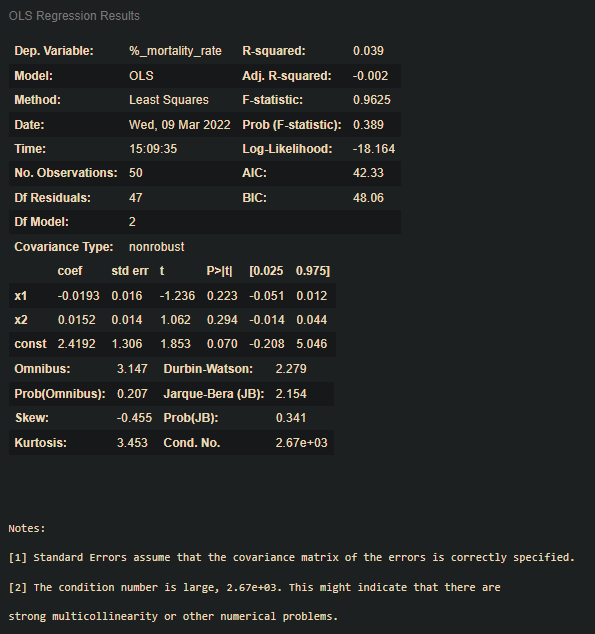
**Median Income + % With Insurance**
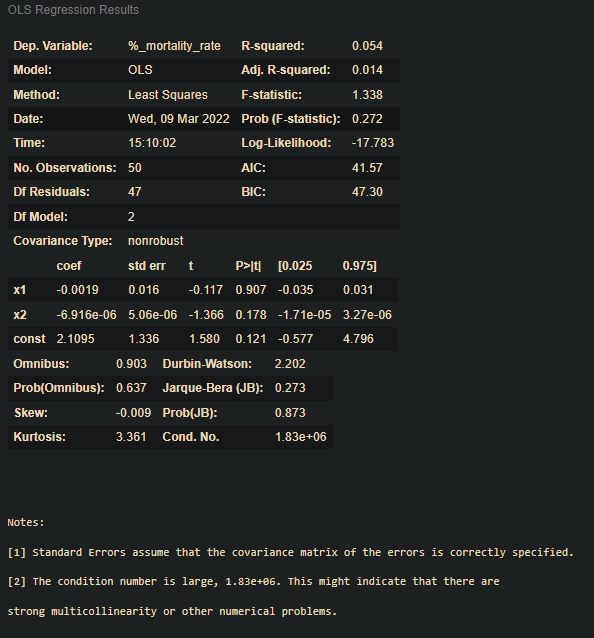

We can see that the multicollinearity is not eliminated by Mean Normalization. Let's try one last approach.
### Approach 1 (Normalize Collinear Data)
#### Min-Max Normalization

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_white_collar", "median_income", "%_with_insurance"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# Min-Max Normalization
mortality_X["median_income"] = (mortality_X["median_income"]-mortality_X["median_income"].min())/(mortality_X["median_income"].max()-mortality_X["median_income"].min())
mortality_X["%_with_insurance"] = (mortality_X["%_with_insurance"]-mortality_X["%_with_insurance"].min())/(mortality_X["%_with_insurance"].max()-mortality_X["%_with_insurance"].min())
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_white_collar"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["median_income"], mortality_OLS_X)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_with_insurance"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["median_income"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# Min-Max Normalization
mortality_X["median_income"] = (mortality_X["median_income"]-mortality_X["median_income"].min())/(mortality_X["median_income"].max()-mortality_X["median_income"].min())
# create variables for least square
mortality_OLS_X = sm.add_constant(mortality_OLS_data["median_income"])# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_with_insurance"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# Min-Max Normalization
mortality_X["%_with_insurance"] = (mortality_X["%_with_insurance"]-mortality_X["%_with_insurance"].min())/(mortality_X["%_with_insurance"].max()-mortality_X["%_with_insurance"].min())
# create variables for least square
mortality_OLS_X = sm.add_constant(mortality_OLS_data["%_with_insurance"])# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_white_collar", "median_income"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# Min-Max Normalization
mortality_X["median_income"] = (mortality_X["median_income"]-mortality_X["median_income"].min())/(mortality_X["median_income"].max()-mortality_X["median_income"].min())
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_white_collar"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["median_income"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_white_collar", "%_with_insurance"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# Min-Max Normalization
mortality_X["%_with_insurance"] = (mortality_X["%_with_insurance"]-mortality_X["%_with_insurance"].min())/(mortality_X["%_with_insurance"].max()-mortality_X["%_with_insurance"].min())
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_white_collar"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_with_insurance"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["median_income", "%_with_insurance"]].copy()
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# Min-Max Normalization
mortality_X["median_income"] = (mortality_X["median_income"]-mortality_X["median_income"].min())/(mortality_X["median_income"].max()-mortality_X["median_income"].min())
mortality_X["%_with_insurance"] = (mortality_X["%_with_insurance"]-mortality_X["%_with_insurance"].min())/(mortality_X["%_with_insurance"].max()-mortality_X["%_with_insurance"].min())
# create variables for least square
ones = np.ones(mortality_X.shape[0])
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["median_income"], ones)))
mortality_OLS_X = sm.add_constant(np.column_stack((mortality_OLS_data["%_with_insurance"], mortality_OLS_X)))
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

Here are the results:

**% White Collar + Median Income + % With Insurance**
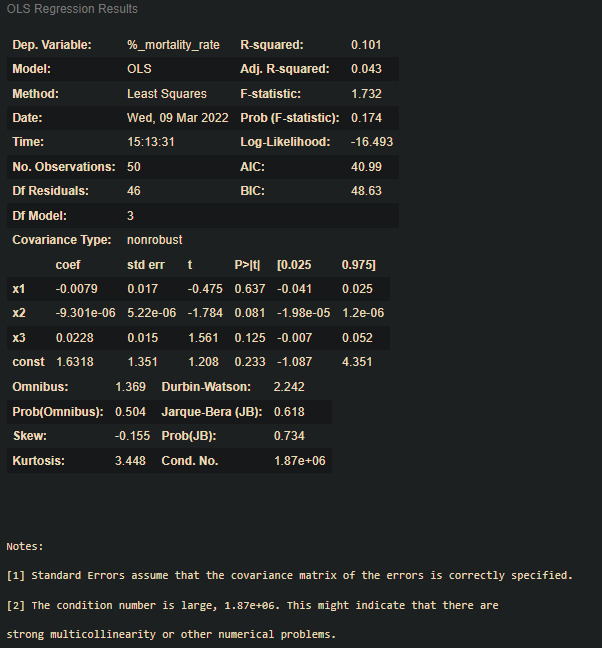
**Median Income**
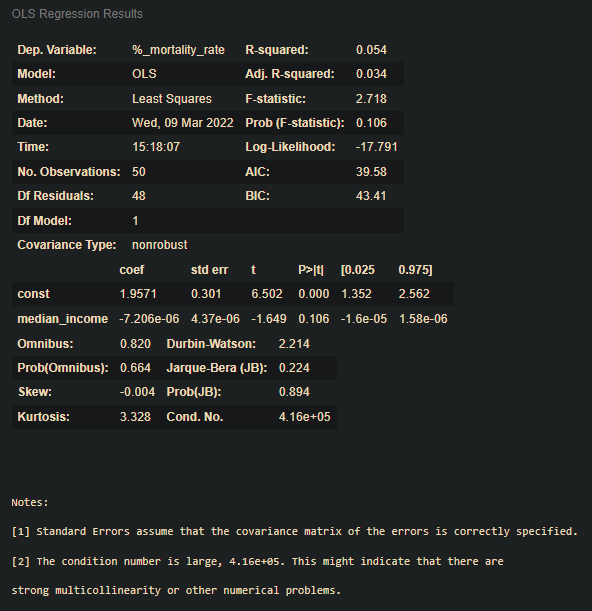
**% With Insurance**
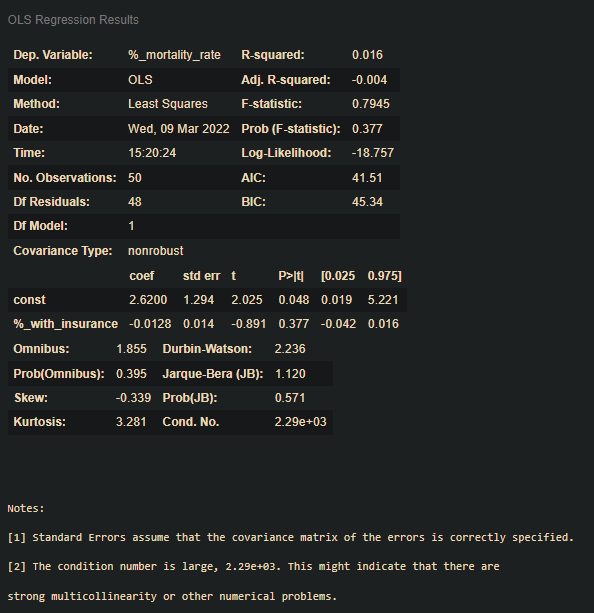
**% White Collar + Median Income**
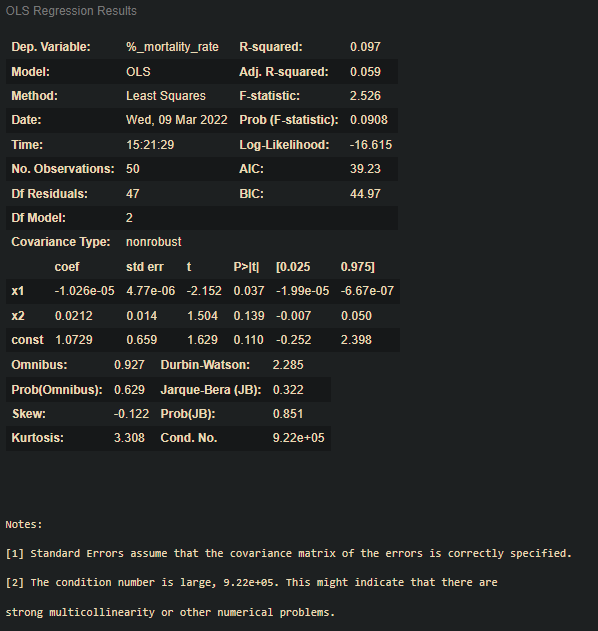
**% White Collar + % With Insurance**
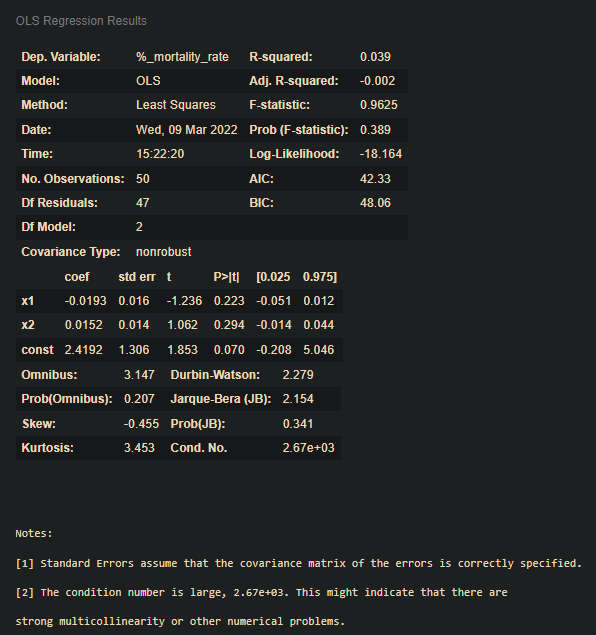
**Median Income + % With Insurance**
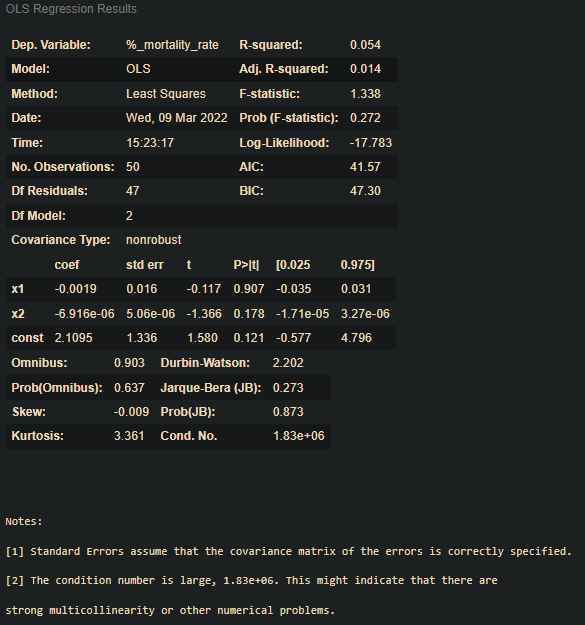

After all these variabilities of normalization, we can see that our efforts were to no avail. We are left with the conclusion that ```median_income``` and ```%_with_insurance``` are collinear with themselves and/or with ```%_mortality_rate```. Therefore, the last approach we will explore is dropping data. We've seen the results of that earlier, and we are left with the simple relationship of 

```%_mortality_rate``` = ```%_white_collar```
### Approach 2 (Dropping collinear data)

In [ ]:
mortality_OLS_data = get_overall_data(12, 12, 2021)
# get least square data
mortality_X = mortality_OLS_data[["%_white_collar"]]
mortality_OLS_Y = mortality_OLS_data["%_mortality_rate"]
# create variables for least square
mortality_OLS_X = sm.add_constant(mortality_OLS_data["%_white_collar"])
# create and fit model
results = sm.OLS(mortality_OLS_Y, mortality_OLS_X).fit()
results.summary()

Looking at our variables, we can see that Median Income and % With Insurance are related. The more income someone has, we can assume that they also have insurance. And with insurance, the mortality rate can be seen to decrease as well. 

There are more avenues of further eliminating multicollinearity such as Principle Component Analysis (PCA), but we lack the knowledge and practice to execute further steps, so we will keep our conclusion as is.

#### Linear regression for infection rate and socioeconomic variables

In [ ]:
from sklearn import linear_model
# 1 day worth of data
infection_regression_data = get_overall_data(12, 12, 2021)
infection_regression_data = infection_regression_data[["%_white_collar", "median_income", "%_with_insurance", "%_infection_rate"]]

# Scatterplot matrix of each data type
sns.pairplot(infection_regression_data, kind="scatter")
plt.show()

# setup regression data
infection_X = infection_regression_data[[ "%_white_collar", "median_income", "%_with_insurance"]]
infection_Y = infection_regression_data["%_infection_rate"]

# create and fit model
infection_model = linear_model.LinearRegression()
infection_model.fit(infection_X, infection_Y)

# get relationship coefficients
print(infection_model.coef_)

# get data
infection_regression_data = pd.DataFrame(columns=["%_white_collar", "median_income", "%_with_insurance", "%_infection_rate"])

for point in data_points:
    df = get_overall_data(*point)
    df = df[[ "%_white_collar", "median_income", "%_with_insurance", "%_infection_rate"]]
    infection_regression_data = pd.concat([infection_regression_data, df], ignore_index=True)

# generate scatterplot matrix   
sns.pairplot(infection_regression_data, kind="scatter")
plt.show()

# setup regression data
infection_X = infection_regression_data[["%_white_collar", "median_income", "%_with_insurance"]]
infection_Y = infection_regression_data["%_infection_rate"]

# create and fit model
infection_model = linear_model.LinearRegression()
infection_model.fit(infection_X, infection_Y)

print(infection_model.coef_)

In [ ]:

import statsmodels.api as sm

infection_regression_data = get_overall_data(12, 12, 2021)
infection_regression_data = infection_regression_data[["%_white_collar", "median_income", "%_with_insurance", "%_infection_rate"]]

#alternate linear regression approach
#formula = """Q('%_infection_rate') ~ Q('%_white_collar')"""

#Multivariate analysis of infection rate with white collar, median income, and with_insurance data.
formula = """Q('%_infection_rate') ~ Q('%_white_collar') + Q('median_income') + Q('%_with_insurance')"""
data = infection_regression_data
dep, predictors = patsy.dmatrices(formula, data)
model = sm.OLS(dep, predictors)
res_1 = model.fit()
print(res_1.summary())


Both the scatter matrix and OLS regression results show the following relationships:

The higher the white collar labor rate, the lower the infection rate (coef = 
-.2686, with a P-value of about 3%)

The median income may be related to lower infection, or not related at all (the scatterplot indicates a clear negative relationship, but the OLS regression shows a coef close to zero with a P-value over 15%).

The rate of people with insurance may be related to lower infection, or not related at all (the scatterplot indicates a clear negative relationship, but the OLS regression shows a coef of -0.1845 with a P-value over 18%).

# The Best Part
One of our biggest goals coming into this project was to be able to create a predictive script that took socioeconomic factors and created a predicted morality and infection rate.

In [ ]:
def prediction(median_income, with_insurance, white_collar, desired_output):
    #calculate alpha given parameters
    coeff = calculate_alpha(median_income, with_insurance, white_collar)
    #use alpha to predict mortality/infection rates
    predicted_mortality = a1*coeff+b1
    predicted_infection = a2*coeff+b2
    #if statements to determine desired output
    if desired_output == 'mortality_rate':
        output = predicted_mortality
        output = f'{desired_output} = {output} %'
    if desired_output == 'infection_rate':
        output = predicted_infection
        output = f'{desired_output} = {output} %'
    if desired_output == 'both':
        output = [predicted_mortality,predicted_infection]
        output = f'mortality_rate = {output[0]}% \ninfection_rate = {output[1]}%'
    return(output)

# Hello user! Feel free to input any values into the prediction function to see what your "hypothetic state" would output for mortality rate and infection rate.
# The first parameter is the median income, second is the % of people w insurance, and the third is the % of workers who fall under white collar work
# The last parameter is whether you want to predict infection or mortality rate. Have fun! Max median income is 100,000.

# user_input = prediction(0, 0, 0, 'mortality_rate')
# print(user_input)

#AN EXAMPLE!
clarafornia = prediction(100000, 90, 50, 'both')
# print(clarafornia)

ernestopia = prediction(2, 2, 2, 'both')
print(ernestopia)

ethantinople = prediction(50000, 20, 40, 'both')

wesafrica = prediction(70000, 60, 20, 'both')

stephenopolis = prediction(100000,100,100,'both')
# print(stephenopolis)

# Ethics & Privacy

There are no concerns regarding personal privacy as the personal information of individuals from datasets will not be used. Most of the data that we will be using are from public government datasets, so we can assume that the data collected are consensual and confidential. However, one of the concerns we discussed was the possibility that certain populations were not as well represented as others in these datasets, such as the possibility that blue collar workers may have the tendency to hide their covid cases to keep working. We also have considered the possibility of underreported covid cases and deaths due to political reasons to make political leaders seem more successful in the pandemic. We will be considering these potential biases during our analysis and our conclusion.

# Conclusion & Discussion

 *Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human · biases in a way that could be a problem?)*

 Potential issues with the labor dataset (elaborate on soon):
 -Data excluded farm laborers and was categorized by industry sector. Without a consensus/definitive understanding of blue-collar/white collar we may have overgeneralized different industry sectors into these two broad categories. For example, leisure is blue collar but obviously white collar jobs related to entertainment and travel exist.
 -Sum of laborers in all industries < total # of laborers, even excluding farm laborers

 Potential issues with other datasets (needed):

More generally:
The use of state somewhat assumes that each state is one contiguous unit, failing to acknowledge that each state can have vast inequalities in wealth and/or socioeconomic indicators, but we went with states because state-level data was easiest to access, most frequently updated, and often prioritized by trusted data-collecting agencies.



# Team Contributions

*Specify who in your group worked on which parts of the project.*